<a href="https://colab.research.google.com/github/ManeSayali/Fraud-bank-account-Detection/blob/main/fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,matthews_corrcoef
import numpy as np
from imblearn.under_sampling import NearMiss
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
#import joblib
from sklearn.metrics import (f1_score, roc_auc_score,confusion_matrix, accuracy_score,
                             precision_score, recall_score)
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_final.csv",index_col=False)

In [ ]:
df.head()

,Unnamed: 0,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,1.0,0.6,-0.613414,0.318182,1.0,0.300429,-0.081230,-0.470476,1.256021,...,0,0,0,0,0,0,0,0,1,0
1,1,1.0,0.6,-0.369315,0.827273,1.0,-0.509901,0.002317,-0.854286,-1.127551,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,0.6,-0.843153,0.718182,0.5,161.639846,0.012128,-0.374286,-0.299512,...,0,0,0,0,0,0,0,1,0,0
3,3,1.0,0.6,-0.627210,-0.281818,1.0,0.203982,-0.060759,-0.431429,-0.438867,...,0,0,0,0,0,1,0,0,0,0
4,4,1.0,0.6,0.196589,1.500000,1.0,-0.560954,0.009282,-0.355238,-0.070547,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.shape

(1000000, 48)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.shape

(1000000, 48)

In [ ]:
X=df.drop(["fraud_bool"],axis=1)
Y=df["fraud_bool"]
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [ ]:
nm = NearMiss()
x_sample, y_sample= nm.fit_resample(x_train,y_train)
print(y_sample.value_counts())

0.0    8823
1.0    8823
Name: fraud_bool, dtype: int64


In [ ]:
from imblearn.under_sampling import ClusterCentroids

In [ ]:
cc = ClusterCentroids(random_state=42)
x_sample, y_sample = cc.fit_resample(X, Y)
print(y_sample.value_count())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#count_class_0, count_class_1 = df.fraud_bool.value_counts()

# Divide by class
#df_class_0 = df[df['fraud_bool'] == 0]
#df_class_1 = df[df['fraud_bool'] == 1]

In [ ]:
#df_class_0_under = df_class_0.sample((count_class_1),random_state=42)
#df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

#print('Random under-sampling:')
#print(df_test_under.fraud_bool.value_counts())

NameError: ignored

In [ ]:
#x = df_test_under.drop('fraud_bool',axis='columns')
#y = df_test_under['fraud_bool']

x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(x_sample, y_sample, test_size=0.2,random_state=42,stratify=y_sample)

ValueError: ignored

In [ ]:
print(x_train_sample.shape)
print(x_test_sample.shape)

NameError: ignored

In [ ]:
weights_assigned={0:1,1:100}

In [ ]:
n_inputs=(len(x_train_sample.columns))

In [ ]:
model = keras.Sequential()
model.add(keras.layers.BatchNormalization(input_shape=[x_train_sample.shape[1]]))
model.add(keras.layers.Dense(512,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))#128
#kernal_initializer='he_uniform' ---> weight initializer for relu 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128,activation='relu'))#64
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64,activation='relu'))#64
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer="Adam")#tf.keras.optimizers.Adam(learning_rate=0.007)
model.fit(x_train_sample,y_train_sample,epochs=100,batch_size=1032)#,class_weight=weights_assigned

Epoch 1/30
18/18 [==============================] - 4s 44ms/step - loss: 0.8110
Epoch 2/30
18/18 [==============================] - 1s 44ms/step - loss: 0.6248
Epoch 3/30
18/18 [==============================] - 1s 45ms/step - loss: 0.5383
Epoch 4/30
18/18 [==============================] - 1s 42ms/step - loss: 0.4833
Epoch 5/30
18/18 [==============================] - 1s 43ms/step - loss: 0.4576
Epoch 6/30
18/18 [==============================] - 1s 44ms/step - loss: 0.4301
Epoch 7/30
18/18 [==============================] - 1s 44ms/step - loss: 0.4227
Epoch 8/30
18/18 [==============================] - 1s 43ms/step - loss: 0.4076
Epoch 9/30
18/18 [==============================] - 1s 42ms/step - loss: 0.3962
Epoch 10/30
18/18 [==============================] - 1s 66ms/step - loss: 0.3845
Epoch 11/30
18/18 [==============================] - 1s 71ms/step - loss: 0.3796
Epoch 12/30
18/18 [==============================] - 1s 73ms/step - loss: 0.3711
Epoch 13/30
18/18 [==================

In [ ]:
y_pred=model.predict(x_test_sample)

6250/6250 [==============================] - 16s 3ms/step


In [ ]:
 print(roc_auc_score(y_test_sample,y_pred))

0.4393428040296254


In [ ]:
y_pred01=np.round(y_pred)
y_pred01=y_pred01.astype(int)
print(classification_report(y_test_sample, y_pred01))
print(confusion_matrix(y_test_sample,y_pred01))

              precision    recall  f1-score   support

         0.0       0.99      0.18      0.30    197794
         1.0       0.01      0.76      0.02      2206

    accuracy                           0.19    200000
   macro avg       0.50      0.47      0.16    200000
weighted avg       0.97      0.19      0.30    200000

[[ 35343 162451]
 [   538   1668]]


In [ ]:
mcc=matthews_corrcoef(y_test_sample,y_pred01)
print(mcc)

-0.017746309119660044


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(model,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

TypeError: ignored

## **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm= SVC(kernel='linear', random_state=42)  
svm.fit(x_train_sample, y_train_sample)


pred_02= svm.predict(x_test_sample)
print(classification_report(y_test_sample,pred_02))
print("roc auc:",roc_auc_score(y_test_sample,pred_02)) 


              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      2206
         1.0       0.91      0.77      0.83      2206

    accuracy                           0.85      4412
   macro avg       0.85      0.85      0.85      4412
weighted avg       0.85      0.85      0.85      4412

roc auc: 0.8467815049864007


In [ ]:
print(confusion_matrix(y_test_sample,pred_02))

[[2030  176]
 [ 500 1706]]


In [ ]:
mcc=matthews_corrcoef(y_test_sample,pred_02)
print(mcc)

0.7011668265836646


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(svm,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[8156  667]
 [1963 6860]]
Accuracy:  0.8509577241301145


## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion="entropy")
rf_clf.fit(x_train_sample, y_train_sample)
rf_clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1832941106)

In [ ]:
y_pred1=rf_clf.predict(x_test_sample)

In [ ]:
cr1=classification_report(y_test_sample,y_pred1)
print(cr1)
print(roc_auc_score(y_test_sample,y_pred1))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2206
         1.0       0.91      0.83      0.87      2206

    accuracy                           0.87      4412
   macro avg       0.88      0.87      0.87      4412
weighted avg       0.88      0.87      0.87      4412

0.8746600181323662


In [ ]:
mcc=matthews_corrcoef(y_test_sample,y_pred1)
print(mcc)
print(confusion_matrix(y_test_sample,y_pred1))

0.7527057845303311
[[2034  172]
 [ 381 1825]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(rf_clf,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[8156  667]
 [1384 7439]]
Accuracy:  0.8837696928482376


In [ ]:
rf_clf.feature_importances_
x_train_sample.columns

feature_importances = pd.Series(rf_clf.feature_importances_, index=x_train_sample.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

days_since_request                  0.075073
session_length_in_minutes           0.071738
bank_branch_count_8w                0.059209
current_address_months_count        0.057744
payment_type_AC                     0.052357
zip_count_4w                        0.052305
velocity_24h                        0.051196
velocity_4w                         0.047298
credit_risk_score                   0.045392
intended_balcon_amount              0.042364
date_of_birth_distinct_emails_4w    0.039144
employment_status_CA                0.039043
velocity_6h                         0.037423
customer_age                        0.036316
name_email_similarity               0.035272
proposed_credit_limit               0.028686
month                               0.028281
income                              0.020637
bank_months_count                   0.019919
payment_type_AA                     0.017927
phone_mobile_valid                  0.016760
device_distinct_emails_8w           0.015097
payment_ty

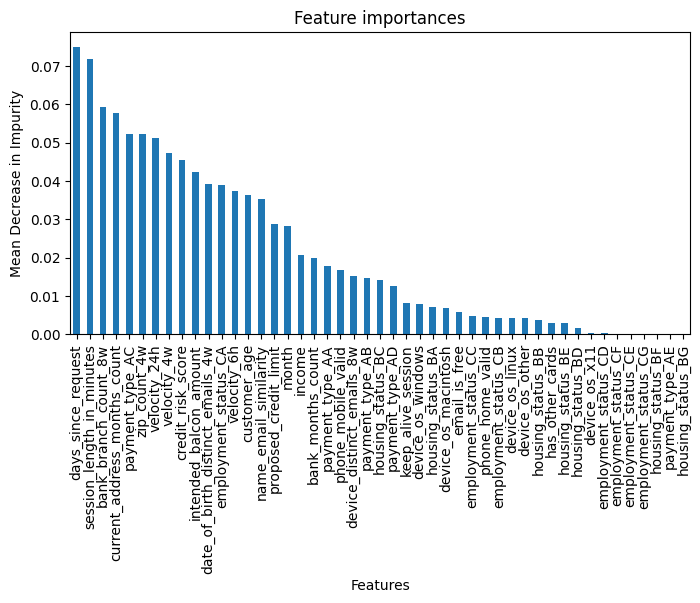

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4), dpi=100)
feature_importances.plot.bar()
plt.title("Feature importances")
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

## **XGboost**

In [ ]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(random_state=42)
xgb1.fit(x_train_sample, y_train_sample)
y_pred03=xgb1.predict(x_test_sample)

NameError: ignored

In [ ]:
print(classification_report(y_test_sample,y_pred03))
print("roc auc:",roc_auc_score(y_test_sample,y_pred03)) 

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      2206
         1.0       0.92      0.84      0.88      2206

    accuracy                           0.88      4412
   macro avg       0.89      0.88      0.88      4412
weighted avg       0.89      0.88      0.88      4412

roc auc: 0.8828195829555757


In [ ]:
mcc=matthews_corrcoef(y_test_sample,y_pred03)
print(mcc)
print(confusion_matrix(y_test_sample,y_pred03))

0.7681721954972137
[[2037  169]
 [ 348 1858]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(xgb1,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[8110  713]
 [1245 7578]]
Accuracy:  0.8890400090672107


## **GB**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
Gb1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
Gb1.fit(x_train_sample, y_train_sample)
y_pred04=Gb1.predict(x_test_sample)


In [ ]:
print(classification_report(y_test_sample,y_pred04))
print("roc auc:",roc_auc_score(y_test_sample,y_pred04)) 

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2206
         1.0       0.91      0.82      0.87      2206

    accuracy                           0.87      4412
   macro avg       0.88      0.87      0.87      4412
weighted avg       0.88      0.87      0.87      4412

roc auc: 0.8728467815049863


In [ ]:
mcc=matthews_corrcoef(y_test_sample,y_pred04)
print("mcc:",mcc)
print(confusion_matrix(y_test_sample,y_pred04))

mcc: 0.7494639688147533
[[2036  170]
 [ 391 1815]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(Gb1,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[8084  739]
 [1403 7420]]
Accuracy:  0.8786127167630058


# **logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR1 = LogisticRegression(random_state=42,max_iter=1000)
LR1.fit(x_train_sample, y_train_sample)
y_pred05=LR1.predict(x_test_sample)

In [ ]:
print(classification_report(y_test_sample,y_pred05))
print("roc auc:",roc_auc_score(y_test_sample,y_pred05)) 
mcc=matthews_corrcoef(y_test_sample,y_pred05)
print("mcc:",mcc)
print(confusion_matrix(y_test_sample,y_pred05))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2206
         1.0       0.88      0.79      0.83      2206

    accuracy                           0.84      4412
   macro avg       0.85      0.84      0.84      4412
weighted avg       0.85      0.84      0.84      4412

roc auc: 0.842701722574796
mcc: 0.6894960905537671
[[1979  227]
 [ 467 1739]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(LR1,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[7942  881]
 [1797 7026]]
Accuracy:  0.8482375609203219


# **naive bayes**

In [ ]:
clf_GB = GaussianNB()

# train the classifier on the training set
clf_GB.fit(x_train_sample, y_train_sample)
y_pred06 = clf_GB.predict(x_test_sample)

In [ ]:
print(classification_report(y_test_sample,y_pred06))
print("roc auc:",roc_auc_score(y_test_sample,y_pred06)) 
mcc=matthews_corrcoef(y_test_sample,y_pred06)
print("mcc:",mcc)
print(confusion_matrix(y_test_sample,y_pred06))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.83      2206
         1.0       0.97      0.63      0.76      2206

    accuracy                           0.80      4412
   macro avg       0.85      0.80      0.80      4412
weighted avg       0.85      0.80      0.80      4412

roc auc: 0.8037171350861287
mcc: 0.6482031168376994
[[2158   48]
 [ 818 1388]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(clf_GB,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[8590  233]
 [3363 5460]]
Accuracy:  0.7962144395330386


# **decision tree**

In [ ]:
DT = DecisionTreeClassifier( max_depth=1, random_state=42)

# train the classifier on the training set
DT.fit(x_train_sample, y_train_sample)

# make predictions on the testing set for Confusion Matrix
y_pred07 = DT.predict(x_test_sample)
confusion_mat = confusion_matrix(y_test_sample, y_pred07)

In [ ]:
print(classification_report(y_test_sample,y_pred07))
print("roc auc:",roc_auc_score(y_test_sample,y_pred07)) 
mcc=matthews_corrcoef(y_test_sample,y_pred07)
print("mcc:",mcc)
print(confusion_matrix(y_test_sample,y_pred07))

              precision    recall  f1-score   support

         0.0       0.66      0.75      0.71      2206
         1.0       0.72      0.62      0.66      2206

    accuracy                           0.69      4412
   macro avg       0.69      0.69      0.68      4412
weighted avg       0.69      0.69      0.68      4412

roc auc: 0.6863100634632819
mcc: 0.3760204642119842
[[1662  544]
 [ 840 1366]]


In [ ]:
y_tr = y_train_sample

y_pr = cross_val_predict(DT,x_train_sample,y_train_sample, cv=5)
print(confusion_matrix(y_tr, y_pr))
print('Accuracy: ', accuracy_score(y_tr,y_pr))

[[6670 2153]
 [3369 5454]]
Accuracy:  0.6870678907401111


In [ ]:
#joblib.dump(model,'/content/drive/MyDrive/ANN_02.joblib')
#pickle.dump(model, open('model_ANN.pkl', 'wb'))
#import pickle